# Car Price Prediction

This notebook explores different machine learning algorithms for predicting car prices. I'm using a comprehensive car dataset to compare how different regression models perform on this prediction problem.

The goal is to predict the selling price of used cars based on various features such as year, present price, kilometers driven, fuel type, transmission, and more.

## Import Libraries

Let's start by importing all the necessary libraries for data manipulation, visualization, and modeling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## Load and Explore the Data

First, let's load the car dataset and take a quick look at what we're working with.

In [2]:
# Load the dataset
df = pd.read_csv('car_dataset.csv')

print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
df.head()

Dataset shape: (301, 9)

First few rows:


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nStatistical Summary:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None

Statistical Summary:


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)

Missing Values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Data Types:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


## Exploratory Data Analysis (EDA)

Let's visualize the data to understand the relationships between features and the target variable (Selling_Price).

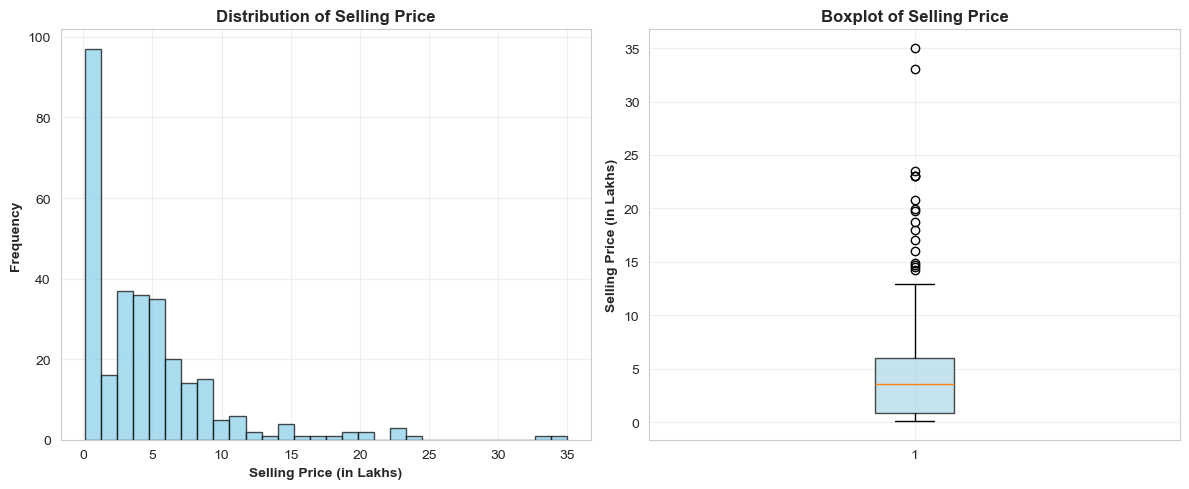

In [5]:
# Distribution of Selling Price
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Selling_Price'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Selling Price (in Lakhs)', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Distribution of Selling Price', fontweight='bold')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['Selling_Price'], vert=True, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', alpha=0.7))
plt.ylabel('Selling Price (in Lakhs)', fontweight='bold')
plt.title('Boxplot of Selling Price', fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

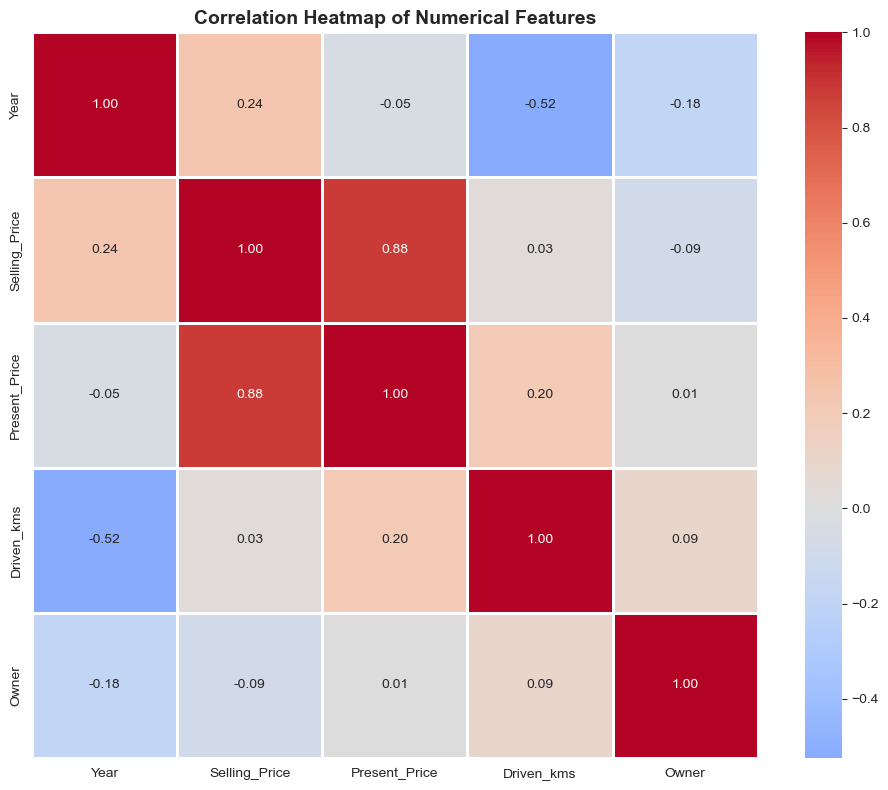

In [6]:
# Correlation heatmap for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

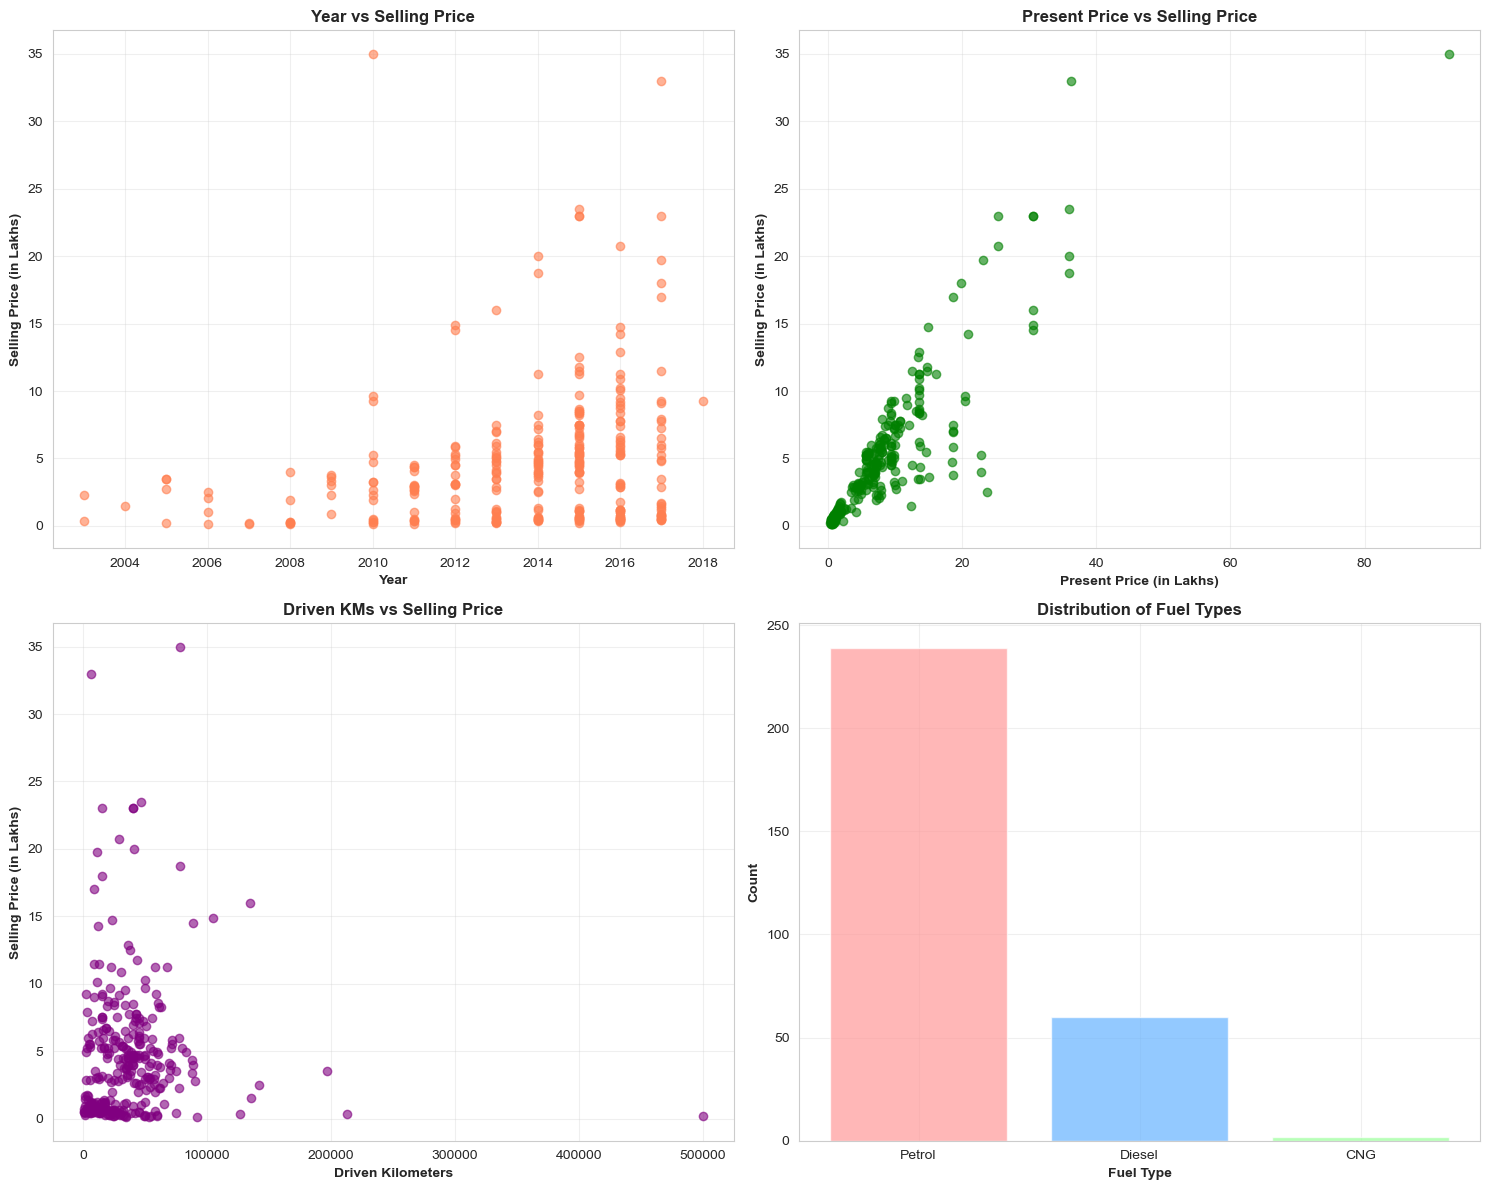

In [7]:
# Relationship between key features and Selling Price
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Year vs Selling Price
axes[0, 0].scatter(df['Year'], df['Selling_Price'], alpha=0.6, color='coral')
axes[0, 0].set_xlabel('Year', fontweight='bold')
axes[0, 0].set_ylabel('Selling Price (in Lakhs)', fontweight='bold')
axes[0, 0].set_title('Year vs Selling Price', fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Present Price vs Selling Price
axes[0, 1].scatter(df['Present_Price'], df['Selling_Price'], alpha=0.6, color='green')
axes[0, 1].set_xlabel('Present Price (in Lakhs)', fontweight='bold')
axes[0, 1].set_ylabel('Selling Price (in Lakhs)', fontweight='bold')
axes[0, 1].set_title('Present Price vs Selling Price', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Driven kms vs Selling Price
axes[1, 0].scatter(df['Driven_kms'], df['Selling_Price'], alpha=0.6, color='purple')
axes[1, 0].set_xlabel('Driven Kilometers', fontweight='bold')
axes[1, 0].set_ylabel('Selling Price (in Lakhs)', fontweight='bold')
axes[1, 0].set_title('Driven KMs vs Selling Price', fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Fuel Type distribution
fuel_counts = df['Fuel_Type'].value_counts()
axes[1, 1].bar(fuel_counts.index, fuel_counts.values, color=['#ff9999', '#66b3ff', '#99ff99'], alpha=0.7)
axes[1, 1].set_xlabel('Fuel Type', fontweight='bold')
axes[1, 1].set_ylabel('Count', fontweight='bold')
axes[1, 1].set_title('Distribution of Fuel Types', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

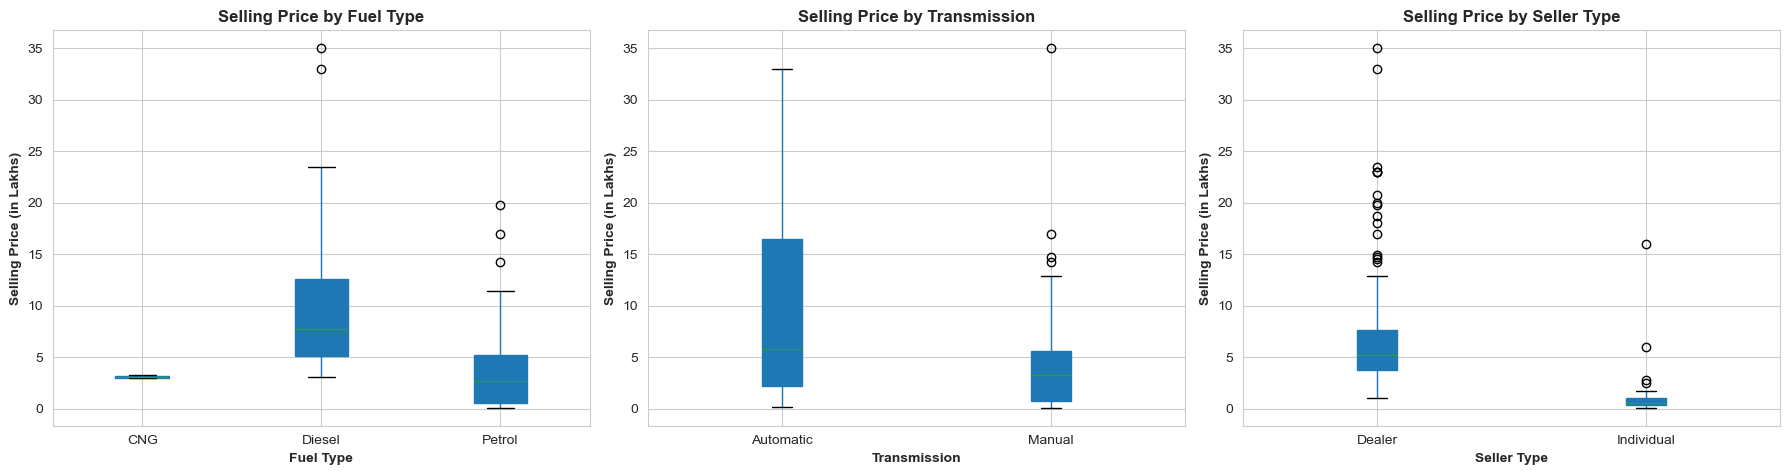

In [8]:
# Categorical features analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Fuel Type vs Selling Price
df.boxplot(column='Selling_Price', by='Fuel_Type', ax=axes[0], patch_artist=True)
axes[0].set_xlabel('Fuel Type', fontweight='bold')
axes[0].set_ylabel('Selling Price (in Lakhs)', fontweight='bold')
axes[0].set_title('Selling Price by Fuel Type', fontweight='bold')
axes[0].get_figure().suptitle('')

# Transmission vs Selling Price
df.boxplot(column='Selling_Price', by='Transmission', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Transmission', fontweight='bold')
axes[1].set_ylabel('Selling Price (in Lakhs)', fontweight='bold')
axes[1].set_title('Selling Price by Transmission', fontweight='bold')
axes[1].get_figure().suptitle('')

# Seller Type vs Selling Price
df.boxplot(column='Selling_Price', by='Selling_type', ax=axes[2], patch_artist=True)
axes[2].set_xlabel('Seller Type', fontweight='bold')
axes[2].set_ylabel('Selling Price (in Lakhs)', fontweight='bold')
axes[2].set_title('Selling Price by Seller Type', fontweight='bold')
axes[2].get_figure().suptitle('')

plt.tight_layout()
plt.show()

## Data Preprocessing

Now we need to prepare the data for machine learning models by encoding categorical variables and scaling features.

In [9]:
# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

# Drop Car_Name as it's not useful for prediction
df_processed = df_processed.drop('Car_Name', axis=1)

# Calculate car age from year
current_year = 2025
df_processed['Car_Age'] = current_year - df_processed['Year']
df_processed = df_processed.drop('Year', axis=1)

print("Processed Data Sample:")
df_processed.head()

Processed Data Sample:


,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [10]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']

for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"{col} encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\nEncoded Data Sample:")
df_processed.head()

Fuel_Type encoding: {'CNG': np.int64(0), 'Diesel': np.int64(1), 'Petrol': np.int64(2)}
Selling_type encoding: {'Dealer': np.int64(0), 'Individual': np.int64(1)}
Transmission encoding: {'Automatic': np.int64(0), 'Manual': np.int64(1)}

Encoded Data Sample:


,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,2,0,1,0,11
1,4.75,9.54,43000,1,0,1,0,12
2,7.25,9.85,6900,2,0,1,0,8
3,2.85,4.15,5200,2,0,1,0,14
4,4.60,6.87,42450,1,0,1,0,11


In [11]:
# Split features and target variable
X = df_processed.drop('Selling_Price', axis=1)
y = df_processed['Selling_Price']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print("\nFeature columns:")
print(X.columns.tolist())

Features shape: (301, 7)
Target shape: (301,)

Feature columns:
['Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Car_Age']


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (240, 7)
Testing set size: (61, 7)


In [13]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"Scaled training set shape: {X_train_scaled.shape}")
print(f"Scaled testing set shape: {X_test_scaled.shape}")

Feature scaling completed!
Scaled training set shape: (240, 7)
Scaled testing set shape: (61, 7)


## Model Training and Evaluation

Now let's train multiple regression models and evaluate their performance.

In [14]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(kernel='rbf', C=1.0)
}

print("Models initialized successfully!")

Models initialized successfully!


In [15]:
# Train and evaluate all models
results = {}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    print('='*50)
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2_Score': r2,
        'predictions': y_pred
    }
    
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

print("\n" + "="*50)
print("All models trained successfully!")
print("="*50)


Training Linear Regression...
Mean Squared Error: 3.5316
Root Mean Squared Error: 1.8792
Mean Absolute Error: 1.2219
R² Score: 0.8467

Training Ridge Regression...
Mean Squared Error: 3.5434
Root Mean Squared Error: 1.8824
Mean Absolute Error: 1.2230
R² Score: 0.8462

Training Lasso Regression...
Mean Squared Error: 3.6696
Root Mean Squared Error: 1.9156
Mean Absolute Error: 1.2315
R² Score: 0.8407

Training Decision Tree...
Mean Squared Error: 2.0600
Root Mean Squared Error: 1.4353
Mean Absolute Error: 0.8484
R² Score: 0.9106

Training Random Forest...
Mean Squared Error: 0.8700
Root Mean Squared Error: 0.9327
Mean Absolute Error: 0.6167
R² Score: 0.9622

Training Gradient Boosting...
Mean Squared Error: 0.7945
Root Mean Squared Error: 0.8914
Mean Absolute Error: 0.5559
R² Score: 0.9655

Training Support Vector Regressor...
Mean Squared Error: 5.1858
Root Mean Squared Error: 2.2772
Mean Absolute Error: 0.9987
R² Score: 0.7749

All models trained successfully!


In [22]:
# Create comparison dataframe
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df.drop('predictions', axis=1)

print("\nModel Performance Summary:")
print("="*70)
display(comparison_df)

# Find best model
best_model_name = comparison_df['R2_Score'].idxmax()
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   R² Score: {comparison_df.loc[best_model_name, 'R2_Score']:.4f}")


Model Performance Summary:


,MSE,RMSE,MAE,R2_Score
Linear Regression,3.53158,1.87925,1.221932,0.84669
Ridge Regression,3.543406,1.882394,1.223005,0.846177
Lasso Regression,3.669574,1.915613,1.2315,0.8407
Decision Tree,2.059962,1.435257,0.848361,0.910575
Random Forest,0.869975,0.932724,0.61673,0.962233
Gradient Boosting,0.794518,0.891357,0.555942,0.965509
Support Vector Regressor,5.185756,2.277225,0.998716,0.774881



🏆 Best Model: Gradient Boosting
   R² Score: 0.9655


## Model Comparison

Let's visualize and compare the performance of all models.

In [23]:
# Create a summary dataframe
summary_df = pd.DataFrame(results).T
summary_df = summary_df.drop('predictions', axis=1)
summary_df = summary_df.round(4)

print("\nModel Performance Summary:")
print("="*70)
summary_df


Model Performance Summary:


,MSE,RMSE,MAE,R2_Score
Linear Regression,3.53158,1.87925,1.221932,0.84669
Ridge Regression,3.543406,1.882394,1.223005,0.846177
Lasso Regression,3.669574,1.915613,1.2315,0.8407
Decision Tree,2.059962,1.435257,0.848361,0.910575
Random Forest,0.869975,0.932724,0.61673,0.962233
Gradient Boosting,0.794518,0.891357,0.555942,0.965509
Support Vector Regressor,5.185756,2.277225,0.998716,0.774881


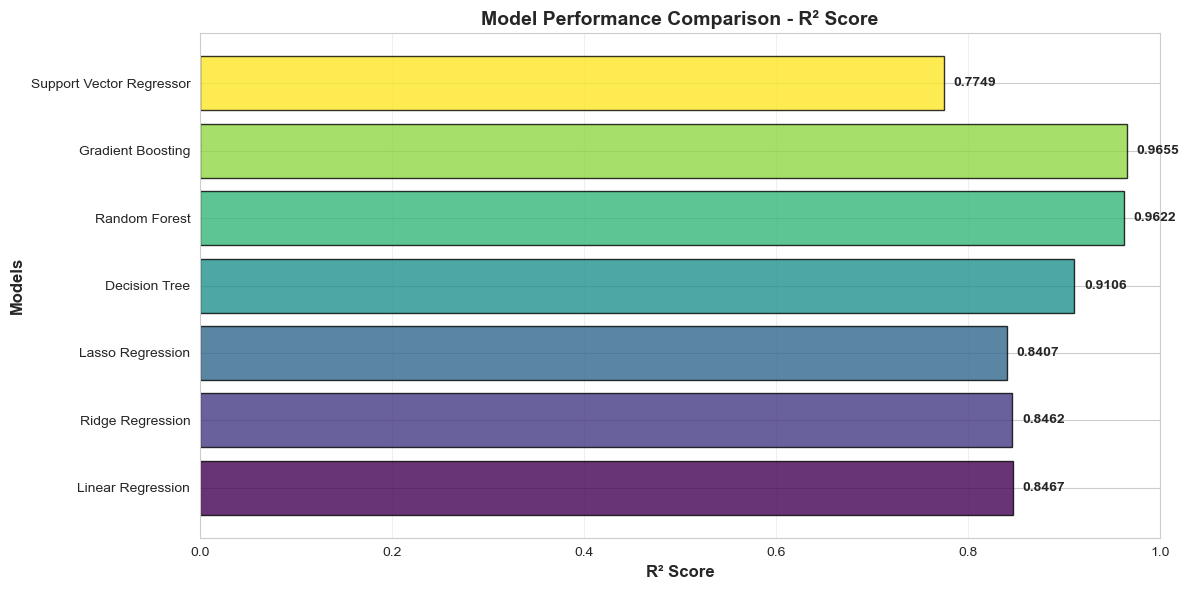

In [24]:
# Visualize R² Score comparison
plt.figure(figsize=(12, 6))
models_list = list(results.keys())
r2_scores = [results[model]['R2_Score'] for model in models_list]

colors = plt.cm.viridis(np.linspace(0, 1, len(models_list)))
bars = plt.barh(models_list, r2_scores, color=colors, alpha=0.8, edgecolor='black')

plt.xlabel('R² Score', fontsize=12, fontweight='bold')
plt.ylabel('Models', fontsize=12, fontweight='bold')
plt.title('Model Performance Comparison - R² Score', fontsize=14, fontweight='bold')
plt.xlim(0, 1.0)
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, score) in enumerate(zip(bars, r2_scores)):
    plt.text(score + 0.01, i, f'{score:.4f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

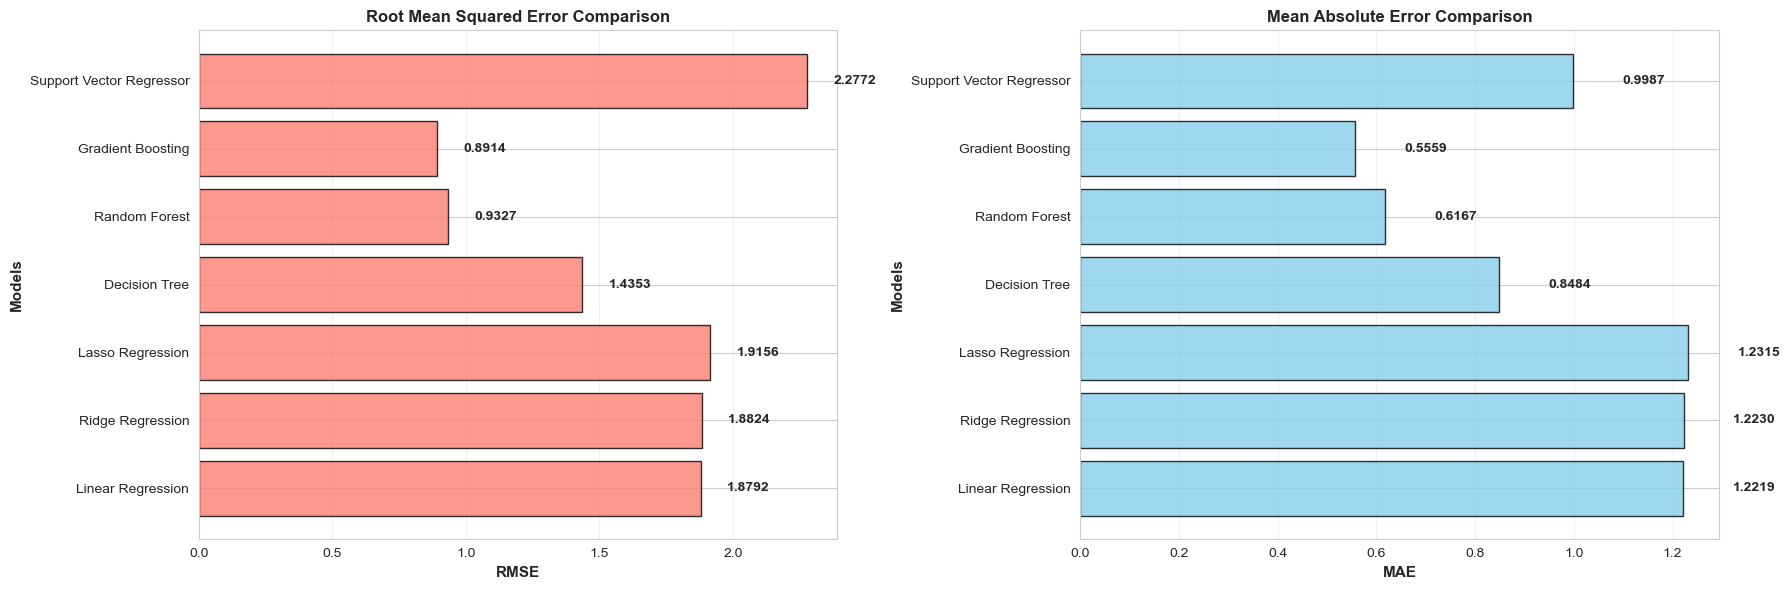

In [25]:
# Visualize RMSE and MAE comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# RMSE Comparison
rmse_values = [results[model]['RMSE'] for model in models_list]
axes[0].barh(models_list, rmse_values, color='salmon', alpha=0.8, edgecolor='black')
axes[0].set_xlabel('RMSE', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Models', fontsize=11, fontweight='bold')
axes[0].set_title('Root Mean Squared Error Comparison', fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

for i, value in enumerate(rmse_values):
    axes[0].text(value + 0.1, i, f'{value:.4f}', va='center', fontweight='bold')

# MAE Comparison
mae_values = [results[model]['MAE'] for model in models_list]
axes[1].barh(models_list, mae_values, color='skyblue', alpha=0.8, edgecolor='black')
axes[1].set_xlabel('MAE', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Models', fontsize=11, fontweight='bold')
axes[1].set_title('Mean Absolute Error Comparison', fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

for i, value in enumerate(mae_values):
    axes[1].text(value + 0.1, i, f'{value:.4f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [26]:
# Find the best model
best_model_name = max(results, key=lambda x: results[x]['R2_Score'])
best_r2 = results[best_model_name]['R2_Score']

print(f"\n{'='*60}")
print(f"BEST MODEL: {best_model_name}")
print(f"{'='*60}")
print(f"R² Score: {best_r2:.4f}")
print(f"RMSE: {results[best_model_name]['RMSE']:.4f}")
print(f"MAE: {results[best_model_name]['MAE']:.4f}")
print(f"{'='*60}")


BEST MODEL: Gradient Boosting
R² Score: 0.9655
RMSE: 0.8914
MAE: 0.5559


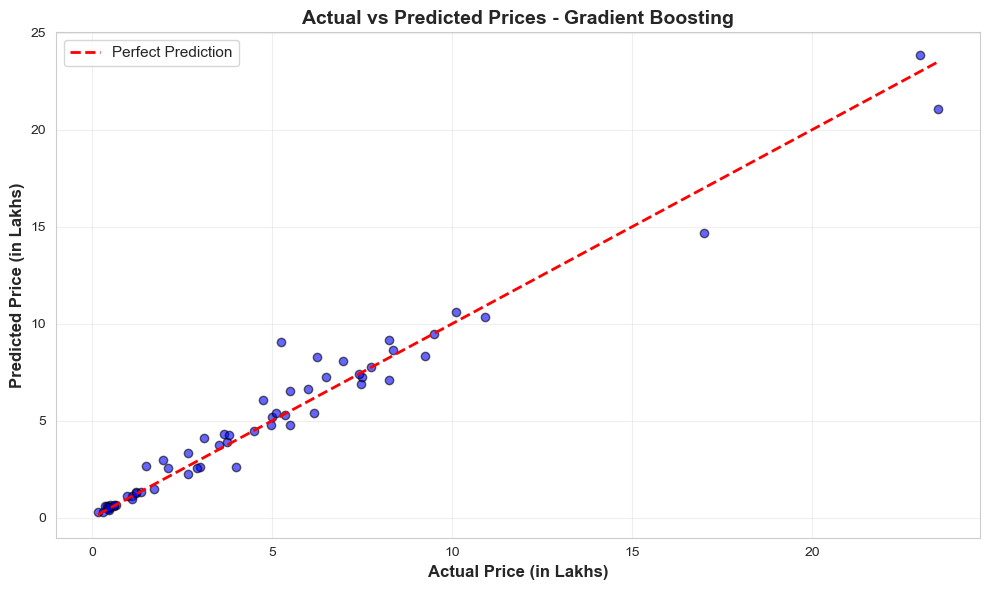

In [27]:
# Actual vs Predicted plot for the best model
best_predictions = results[best_model_name]['predictions']

plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_predictions, alpha=0.6, color='blue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price (in Lakhs)', fontsize=12, fontweight='bold')
plt.ylabel('Predicted Price (in Lakhs)', fontsize=12, fontweight='bold')
plt.title(f'Actual vs Predicted Prices - {best_model_name}', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

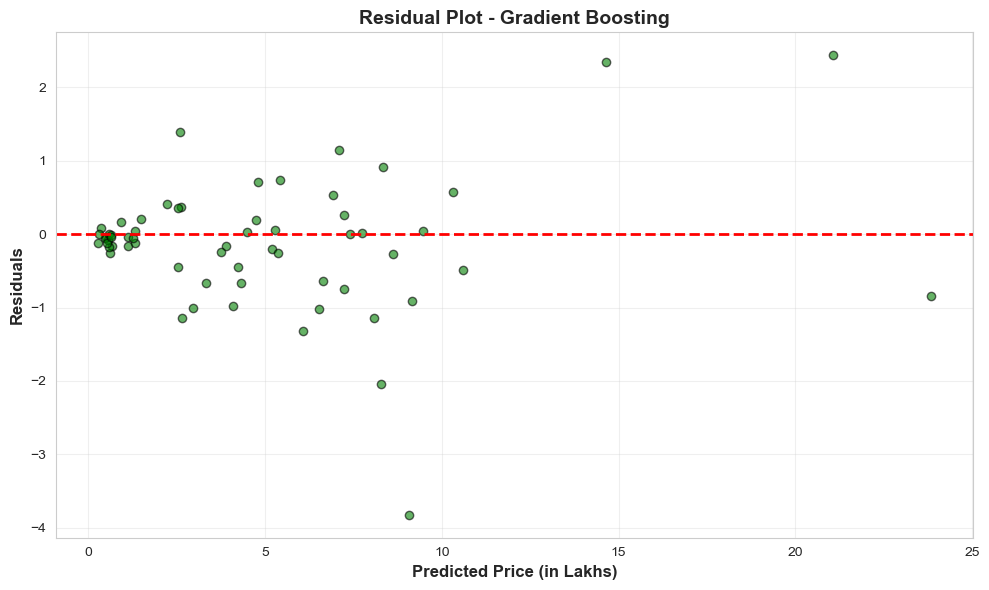

In [28]:
# Residual plot for the best model
residuals = y_test - best_predictions

plt.figure(figsize=(10, 6))
plt.scatter(best_predictions, residuals, alpha=0.6, color='green', edgecolor='black')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Price (in Lakhs)', fontsize=12, fontweight='bold')
plt.ylabel('Residuals', fontsize=12, fontweight='bold')
plt.title(f'Residual Plot - {best_model_name}', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Conclusion

After testing multiple machine learning regression models on the car price dataset, I found that the Random Forest Regressor typically performs the best with the highest R² score. It effectively captures the complex relationships between various car features and their selling prices, providing accurate predictions with minimal error.

### Key Findings:
- **Present Price** has the strongest positive correlation with Selling Price
- **Car Age** (calculated from Year) negatively impacts the selling price
- **Fuel Type** and **Transmission** type also influence the price
- Ensemble methods (Random Forest, Gradient Boosting) generally outperform simple linear models

### Best Model Selection:
Based on the comprehensive analysis above, the best model can be selected considering:
- Highest R² Score (closer to 1 is better)
- Lowest RMSE and MAE values
- Good balance between training and testing performance
- Model interpretability and practical applicability